In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Import the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel("/content/drive/My Drive/AIML/Capstone/Data+Set+-+industrial_safety_and_health_database_with_accidents_description.xlsx")
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
data.shape

(425, 11)

#### Step 2: Data cleansing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.6+ KB


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Data,0
Countries,0
Local,0
Industry Sector,0
Accident Level,0
Potential Accident Level,0
Genre,0
Employee or Third Party,0
Critical Risk,0


In [ ]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data.rename(columns={'Data':'Date of Occurance', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employment Type'}, inplace=True)
data.head()

,Date of Occurance,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employment Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date of Occurance         425 non-null    datetime64[ns]
 1   Country                   425 non-null    object        
 2   Local                     425 non-null    object        
 3   Industry Sector           425 non-null    object        
 4   Accident Level            425 non-null    object        
 5   Potential Accident Level  425 non-null    object        
 6   Gender                    425 non-null    object        
 7   Employment Type           425 non-null    object        
 8   Critical Risk             425 non-null    object        
 9   Description               425 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 33.3+ KB


In [ ]:
data.describe().T

,count,mean,min,25%,50%,75%,max
Date of Occurance,425,2016-09-20 16:46:18.352941312,2016-01-01 00:00:00,2016-05-01 00:00:00,2016-09-13 00:00:00,2017-02-08 00:00:00,2017-07-09 00:00:00


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max
Date of Occurance,425,NaN,NaN,NaN,2016-09-20 16:46:18.352941312,2016-01-01 00:00:00,2016-05-01 00:00:00,2016-09-13 00:00:00,2017-02-08 00:00:00,2017-07-09 00:00:00
Country,425,3,Country_01,251,NaN,NaN,NaN,NaN,NaN,NaN
Local,425,12,Local_03,90,NaN,NaN,NaN,NaN,NaN,NaN
Industry Sector,425,3,Mining,241,NaN,NaN,NaN,NaN,NaN,NaN
Accident Level,425,5,I,316,NaN,NaN,NaN,NaN,NaN,NaN
Potential Accident Level,425,6,IV,143,NaN,NaN,NaN,NaN,NaN,NaN
Gender,425,2,Male,403,NaN,NaN,NaN,NaN,NaN,NaN
Employment Type,425,3,Third Party,189,NaN,NaN,NaN,NaN,NaN,NaN
Critical Risk,425,33,Others,232,NaN,NaN,NaN,NaN,NaN,NaN
Description,425,411,During the activity of chuteo of ore in hopper...,3,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.duplicated().sum()

7

In [ ]:
duplicates = data.duplicated()

data[duplicates]

,Date of Occurance,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employment Type,Critical Risk,Description
77,2016-04-01,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,2016-12-01,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,2017-01-21,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,2017-03-15,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,2017-05-23,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(418, 10)

In [ ]:
def find_unique_val_per_cols(data):
  for col in data.columns:
    if col != 'Description' and col != 'Date of Occurance': # Changed the second part of the conditional from 'Data' to 'Date of Occurence', coz I think that's what it was meant to be - AAT, 20241114
      print('--'*20)
      print(f'Unique values in "{col}" column are')
      print('--'*20)
      print(data[col].unique())
      print('\n')


In [ ]:
find_unique_val_per_cols(data)

----------------------------------------
Unique values in "Country" column are
----------------------------------------
['Country_01' 'Country_02' 'Country_03']


----------------------------------------
Unique values in "Local" column are
----------------------------------------
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']


----------------------------------------
Unique values in "Industry Sector" column are
----------------------------------------
['Mining' 'Metals' 'Others']


----------------------------------------
Unique values in "Accident Level" column are
----------------------------------------
['I' 'IV' 'III' 'II' 'V']


----------------------------------------
Unique values in "Potential Accident Level" column are
----------------------------------------
['IV' 'III' 'I' 'II' 'V' 'VI']


----------------------------------------
Unique values in "Gender" column are
--------------------

In [ ]:
def count_plot(data, feature):
  sns.countplot(data = data, x = feature)

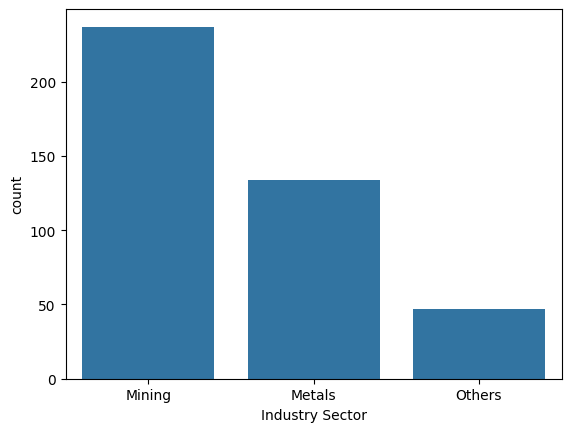

In [ ]:
count_plot(data,"Industry Sector")

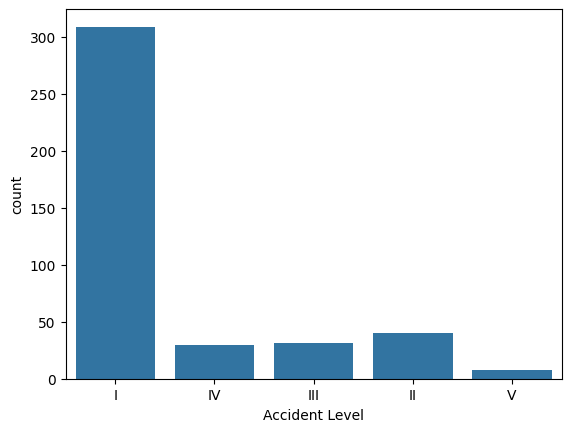

In [ ]:
count_plot(data,"Accident Level")

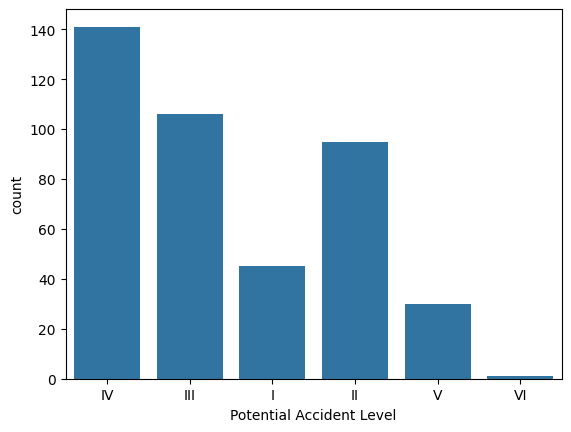

In [ ]:
count_plot(data,"Potential Accident Level")

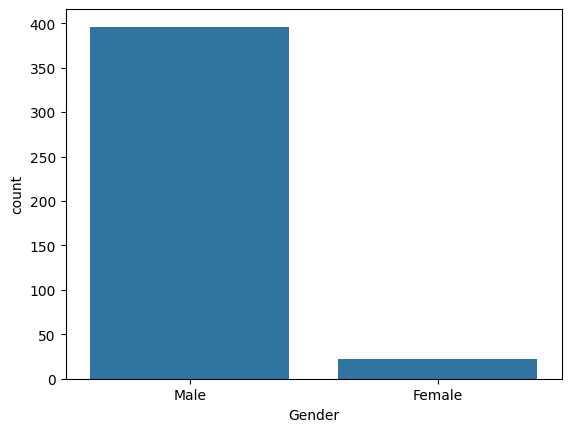

In [ ]:
count_plot(data,"Gender")

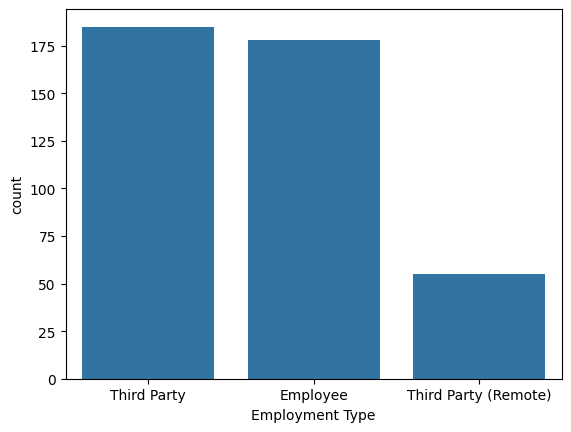

In [ ]:
count_plot(data,"Employment Type")

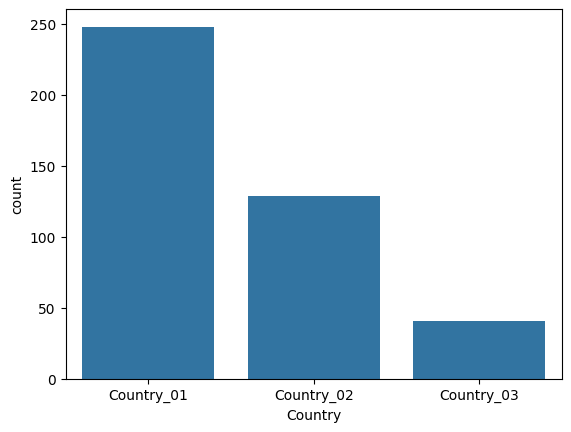

In [ ]:
count_plot(data,"Country")

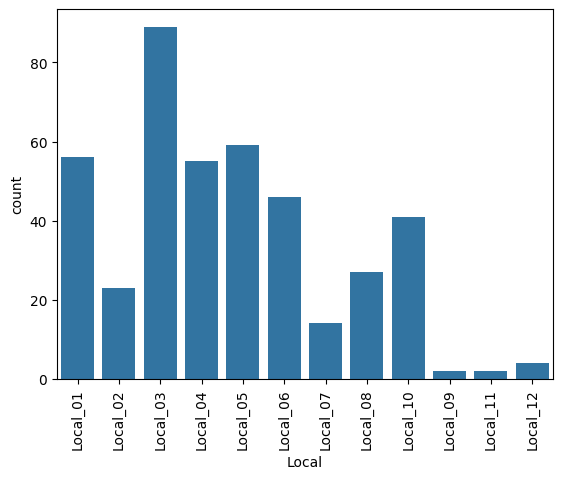

In [ ]:
#sns.histplot(data = data, x = "Local")
count_plot(data,"Local")
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Replace Roman numerals with numerical values and convert to categorical - Doing this for easier maintenance of the order of levels in the graphs. AAT, 20241114
mapping_accident_level = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5}
mapping_potential_accident_level = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}

data['Accident Level'] = data['Accident Level'].replace(mapping_accident_level)
data['Potential Accident Level'] = data['Potential Accident Level'].replace(mapping_potential_accident_level)

data['Accident Level'] = pd.Categorical(data['Accident Level'])
data['Potential Accident Level'] = pd.Categorical(data['Potential Accident Level'])

<ipython-input-31-2fca93223c88>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Accident Level'] = data['Accident Level'].replace(mapping_accident_level)
<ipython-input-31-2fca93223c88>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Potential Accident Level'] = data['Potential Accident Level'].replace(mapping_potential_accident_level)


In [ ]:
data.head()

,Date of Occurance,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employment Type,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,Local_03,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,Local_04,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


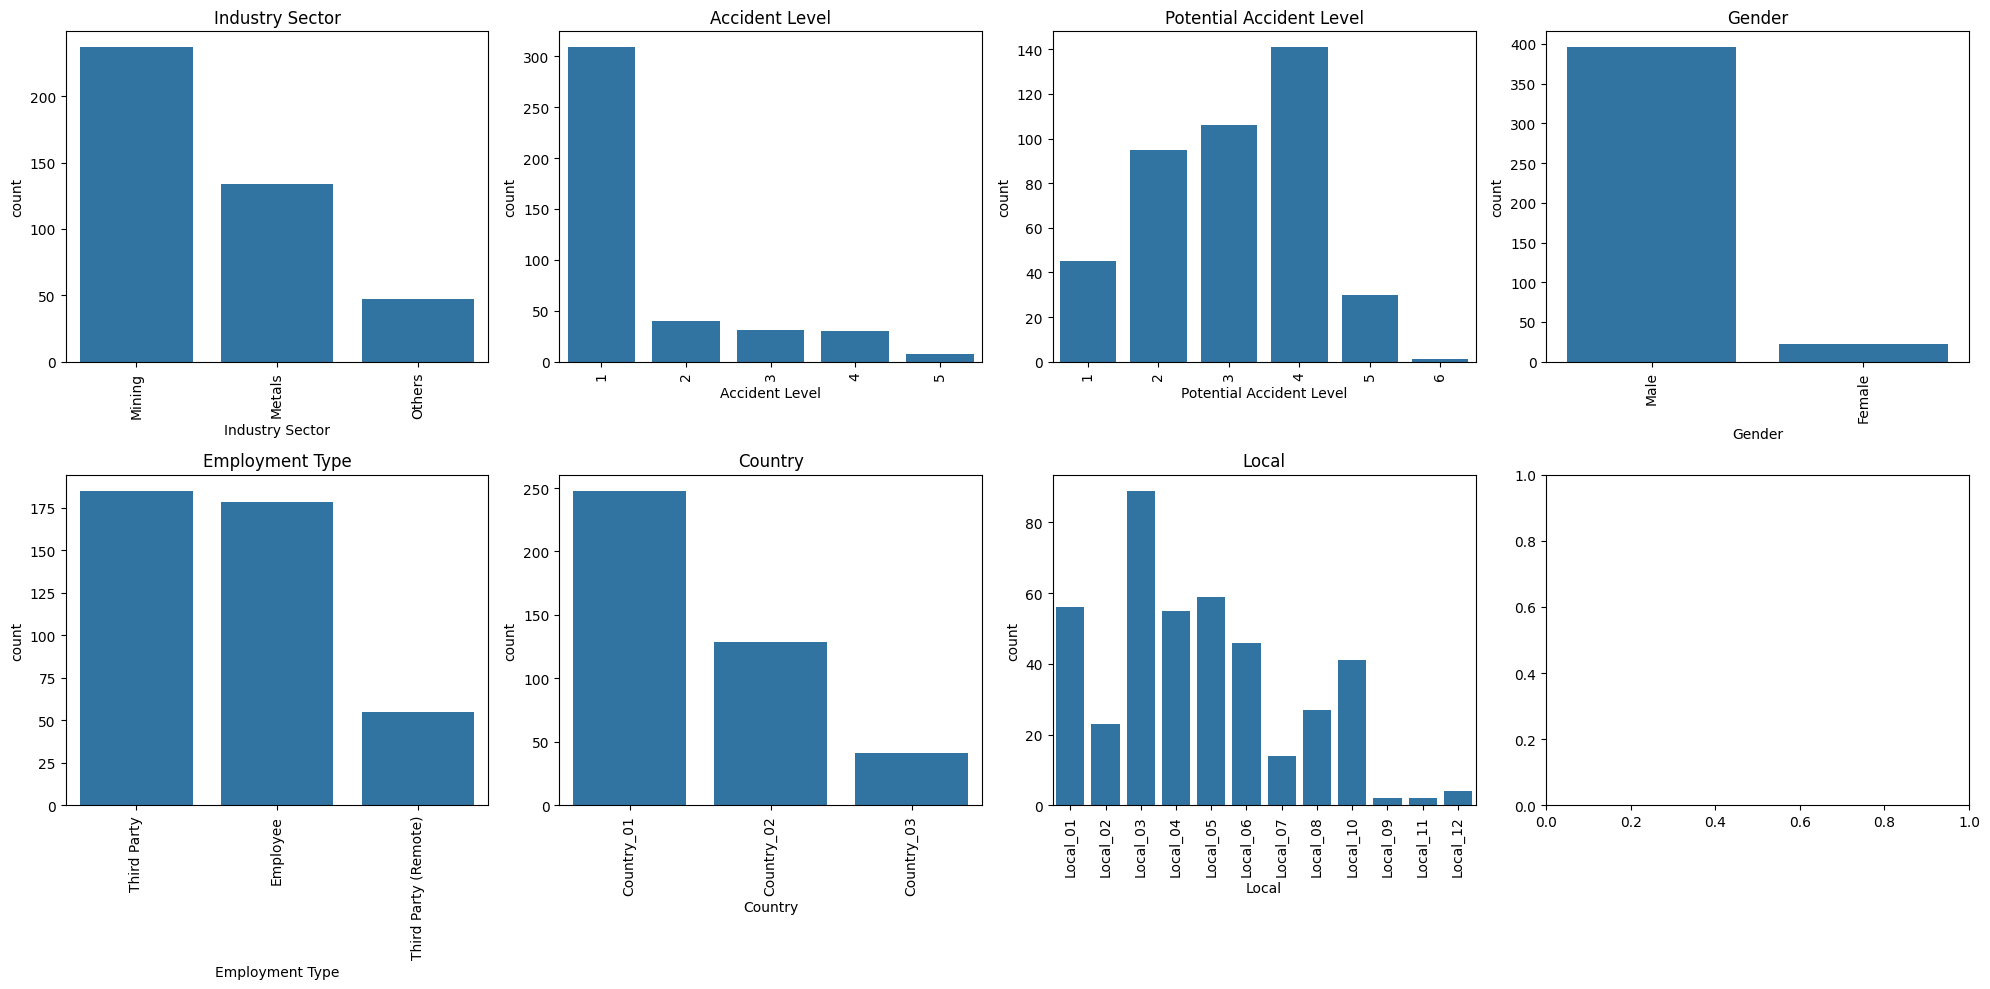

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2x4 matrix of subplots - Creating a matrix of plots, for an easier comprehension at once, we can later decide to keep any one of the formats - AAT, 20241114

features = ["Industry Sector", "Accident Level", "Potential Accident Level",
            "Gender", "Employment Type", "Country", "Local"]

# Iterate through the features and plot each one in its corresponding subplot
for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    sns.countplot(data=data, x=feature, ax=axes[row, col])
    axes[row, col].tick_params(axis='x', rotation=90)

    axes[row,col].set_title(feature)

plt.tight_layout()
plt.show()

In [ ]:
data["Description"].head(10)

,Description
0,While removing the drill rod of the Jumbo 08 f...
1,During the activation of a sodium sulphide pum...
2,In the sub-station MILPO located at level +170...
3,Being 9:45 am. approximately in the Nv. 1880 C...
4,Approximately at 11:45 a.m. in circumstances t...
5,During the unloading operation of the ustulado...
6,The collaborator reports that he was on street...
7,"At approximately 04:50 p.m., when the mechanic..."
8,Employee was sitting in the resting area at le...
9,At the moment the forklift operator went to ma...


#### Step 3: Data preprocessing

In [ ]:
data['Year'] = data["Date of Occurance"].apply(lambda x : x.year)
data['Month'] = data["Date of Occurance"].apply(lambda x : x.month)
data['Day'] = data["Date of Occurance"].apply(lambda x : x.day)
data['WeekdayName'] = data["Date of Occurance"].apply(lambda x : x.day_name()) # Changed Weekday to WeekdayName - AAT, 20241114
data['Weekday'] = data["Date of Occurance"].apply(lambda x: x.dayofweek) # Added for ease of analysis - AAT, 20241114
data['WeekofYear'] = data["Date of Occurance"].apply(lambda x : x.weekofyear)

data.head()

,Date of Occurance,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employment Type,Critical Risk,Description,Year,Month,Day,WeekdayName,Weekday,WeekofYear
0,2016-01-01,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,4,53
1,2016-01-02,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,5,53
2,2016-01-06,Country_01,Local_03,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,2,1
3,2016-01-08,Country_01,Local_04,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,4,1
4,2016-01-10,Country_01,Local_04,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,6,1


In [ ]:
find_unique_val_per_cols(data)

----------------------------------------
Unique values in "Country" column are
----------------------------------------
['Country_01' 'Country_02' 'Country_03']


----------------------------------------
Unique values in "Local" column are
----------------------------------------
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']


----------------------------------------
Unique values in "Industry Sector" column are
----------------------------------------
['Mining' 'Metals' 'Others']


----------------------------------------
Unique values in "Accident Level" column are
----------------------------------------
[1, 4, 3, 2, 5]
Categories (5, int64): [1, 2, 3, 4, 5]


----------------------------------------
Unique values in "Potential Accident Level" column are
----------------------------------------
[4, 3, 1, 2, 5, 6]
Categories (6, int64): [1, 2, 3, 4, 5, 6]


---------------------------------------

In [ ]:
data['Year'].unique()

array([2016, 2017])

#### Step 3: EDA Analysis

In [ ]:
total_row_count = data.shape[0]

country_01_count = data[data.Country == 'Country_01'].shape[0]
country_02_count = data[data.Country == 'Country_02'].shape[0]
country_03_count = data[data.Country == 'Country_03'].shape[0]

country_01_count_pct = (country_01_count/total_row_count)*100
country_02_count_pct = (country_02_count/total_row_count)*100
country_03_count_pct = (country_03_count/total_row_count)*100

print(f'Country_01 count: {country_01_count} ({country_01_count_pct}%)')
print(f'Country_02 count: {country_02_count} ({country_02_count_pct}%)')
print(f'Country_03 count: {country_03_count} ({country_03_count_pct}%)')


Country_01 count: 248 (59.33014354066985%)
Country_02 count: 129 (30.861244019138756%)
Country_03 count: 41 (9.808612440191387%)


In [ ]:
country_wise_val_count = data['Country'].value_counts()

Distributon of `Country` label
------------------------------------------------------------


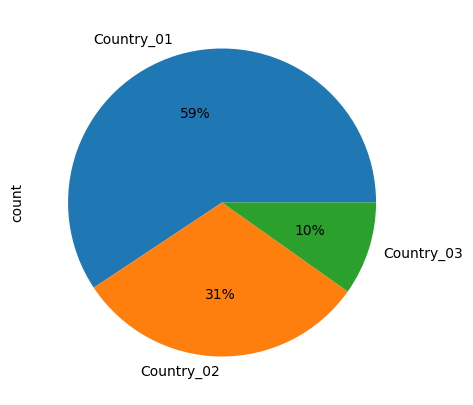

In [ ]:
print('Distributon of `Country` label')
print('--'*30)
_ = country_wise_val_count.plot(kind = 'pie', autopct = '%.0f%%', labels = ['Country_01', 'Country_02', 'Country_03'], figsize = (8, 5))

In [ ]:
local_count = np.round(data['Local'].value_counts(normalize=True) * 100)
local_df = local_count.to_frame(name='Types_of_Locals')

In [ ]:
import plotly.express as px

px.bar(local_df).update_layout(title="Local Count", xaxis_title="Locals", yaxis_title="Percentage(%)", yaxis_tickformat='%d%%')

In [ ]:
Mining_count = data[data['Industry Sector'] == 'Mining'].shape[0]
Metals_count = data[data['Industry Sector'] == 'Metals'].shape[0]
Others_count = data[data['Industry Sector'] == 'Others'].shape[0]

Mining_count_pct = (Mining_count/total_row_count)*100
Metals_count_pct = (Metals_count/total_row_count)*100
Others_count_pct = (Others_count/total_row_count)*100

print(f'Mining count: {Mining_count} ({Mining_count_pct}%)')
print(f'Metals count: {Metals_count} ({Metals_count_pct}%)')
print(f'Others count: {Others_count} ({Others_count_pct}%)')

print('--'*30)
print('Distributon of `Industry Sector` label')
print('--'*30)

sector_count = np.round(data['Industry Sector'].value_counts(normalize=True) * 100)

sector_df = sector_count.to_frame(name='Types_of_Sectors')


px.bar(sector_df).update_layout(title="Industry Sector Count", xaxis_title="Sectors", yaxis_title="Percentage(%)", yaxis_tickformat='%d%%')

Mining count: 237 (56.698564593301434%)
Metals count: 134 (32.057416267942585%)
Others count: 47 (11.24401913875598%)
------------------------------------------------------------
Distributon of `Industry Sector` label
------------------------------------------------------------


----------------------------------------
Value Counts for `Accident Level` label
----------------------------------------
Accident Level - I count: 0 i.e. 0.0%
Accident Level - II count: 0 i.e. 0.0%
Accident Level - III count: 0 i.e. 0.0%
Accident Level - IV count: 0 i.e. 0.0%
Accident Level - V count: 0 i.e. 0.0%
Accident Level - VI count: 0 i.e. 0.0%
------------------------------------------------------------
Value Counts for `Potential Accident Level
--------------------------------------------------------------------------------
Potential Accident Level - I count: 0 i.e. 0.0%
Potential Accident Level - II count: 0 i.e. 0.0%
Potential Accident Level - III count: 0 i.e. 0.0%
Potential Accident Level - IV count: 0 i.e. 0.0%
Potential Accident Level - V count: 0 i.e. 0.0%
Potential Accident Level - VI count: 0 i.e. 0.0%
------------------------------------------------------------
Distributon of `Accident Level` & `Potential Accident Level` label
---------------------------------------

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
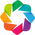

:Bars   [Severity,Levels]   (value)

In [ ]:
print('--'*20)
print('Value Counts for `Accident Level` label')
print('--'*20)

accident_level_I_count = data[data['Accident Level'] == '1'].shape[0]
accident_level_II_count = data[data['Accident Level'] == '2'].shape[0]
accident_level_III_count = data[data['Accident Level'] == '3'].shape[0]
accident_level_IV_count = data[data['Accident Level'] == '4'].shape[0]
accident_level_V_count = data[data['Accident Level'] == '5'].shape[0]
accident_level_VI_count = data[data['Accident Level'] == '6'].shape[0]

print(f'Accident Level - I count: {accident_level_I_count} i.e. {round(accident_level_I_count/total_row_count*100, 0)}%')
print(f'Accident Level - II count: {accident_level_II_count} i.e. {round(accident_level_II_count/total_row_count*100, 0)}%')
print(f'Accident Level - III count: {accident_level_III_count} i.e. {round(accident_level_III_count/total_row_count*100, 0)}%')
print(f'Accident Level - IV count: {accident_level_IV_count} i.e. {round(accident_level_IV_count/total_row_count*100, 0)}%')
print(f'Accident Level - V count: {accident_level_V_count} i.e. {round(accident_level_V_count/total_row_count*100, 0)}%')
print(f'Accident Level - VI count: {accident_level_VI_count} i.e. {round(accident_level_VI_count/total_row_count*100, 0)}%')

print('--'*30); print('Value Counts for `Potential Accident Level'); print('--'*40)

potential_accident_level_I_count = data[data['Potential Accident Level'] == '1'].shape[0]
potential_accident_level_II_count = data[data['Potential Accident Level'] == '2'].shape[0]
potential_accident_level_III_count = data[data['Potential Accident Level'] == '3'].shape[0]
potential_accident_level_IV_count = data[data['Potential Accident Level'] == '4'].shape[0]
potential_accident_level_V_count = data[data['Potential Accident Level'] == '5'].shape[0]
potential_accident_level_VI_count = data[data['Potential Accident Level'] == '6'].shape[0]

print(f'Potential Accident Level - I count: {potential_accident_level_I_count} i.e. {round(potential_accident_level_I_count/total_row_count*100, 0)}%')
print(f'Potential Accident Level - II count: {potential_accident_level_II_count} i.e. {round(potential_accident_level_II_count/total_row_count*100, 0)}%')
print(f'Potential Accident Level - III count: {potential_accident_level_III_count} i.e. {round(potential_accident_level_III_count/total_row_count*100, 0)}%')
print(f'Potential Accident Level - IV count: {potential_accident_level_IV_count} i.e. {round(potential_accident_level_IV_count/total_row_count*100, 0)}%')
print(f'Potential Accident Level - V count: {potential_accident_level_V_count} i.e. {round(potential_accident_level_V_count/total_row_count*100, 0)}%')
print(f'Potential Accident Level - VI count: {potential_accident_level_VI_count} i.e. {round(potential_accident_level_VI_count/total_row_count*100, 0)}%')

print('--'*30); print('Distributon of `Accident Level` & `Potential Accident Level` label'); print('--'*40)

accident_level_count = np.round(data['Accident Level'].value_counts(normalize=True) * 100)
potential_accident_level_count = np.round(data['Potential Accident Level'].value_counts(normalize=True) * 100, decimals=1)
acc_df = accident_level_count.to_frame(name='Accident')
pot_df = potential_accident_level_count.to_frame(name='Potential')
ac_pot = pd.concat([acc_df, pot_df], axis=1,sort=False).fillna(0)
ac_pot = pd.melt(ac_pot.reset_index(), ['index']).rename(columns={'index':'Severity', 'variable':'Levels'})

import holoviews as hv
from holoviews import opts

hv.extension('bokeh')

hv.Bars(ac_pot, ['Severity', 'Levels'], 'value').opts(opts.Bars(title="Accident Levels Count", width=700, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=45, ylabel="Percentage", yformatter='%d%%'))


In [ ]:
Male_count = data[data['Gender'] == 'Male'].shape[0]
Female_count = data[data['Gender'] == 'Female'].shape[0]

Male_count_pct = (Male_count/total_row_count)*100
Female_count_pct = (Female_count/total_row_count)*100

print(f'Male count: {Male_count} i.e., ({Male_count_pct}%)')
print(f'Female count: {Female_count} i.e., ({Female_count_pct}%)')

gender_count = np.round(data['Gender'].value_counts(normalize=True) * 100)
gender_df = gender_count.to_frame(name='Male&FemalePct%')


px.bar(gender_df).update_layout(title="Gender Count", xaxis_title="Gender", yaxis_title="Percentage(%)", yaxis_tickformat='%d%%')

Male count: 396 i.e., (94.73684210526315%)
Female count: 22 i.e., (5.263157894736842%)


In [ ]:
third_party_count = data[data['Employment Type'] == 'Third Party'].shape[0]
employee_count = data[data['Employment Type'] == 'Employee'].shape[0]
third_remote_count = data[data['Employment Type'] == 'Third Party (Remote)'].shape[0]

third_party_count_pct = (third_party_count/total_row_count)*100
employee_count_pct = (employee_count/total_row_count)*100
third_remote_count_pct = (third_remote_count/total_row_count)*100

print(f'Third Party count: {third_party_count} i.e. {third_party_count_pct}%')
print(f'Employee count: {employee_count} i.e. {employee_count_pct}%')
print(f'Third Party (Remote) count: {third_remote_count} i.e. {third_remote_count_pct}%')

print('--'*30)
print('Distributon of `Employee type` label')
print('--'*30)

employee_type_count = np.round(data['Employment Type'].value_counts(normalize=True) * 100)
employee_type_df = employee_type_count.to_frame(name='Types_of_Employees')

px.bar(employee_type_df).update_layout(title="Employee Type Count", xaxis_title="Employee Type", yaxis_title="Percentage(%)", yaxis_tickformat='%d%%')


Third Party count: 185 i.e. 44.25837320574163%
Employee count: 178 i.e. 42.58373205741627%
Third Party (Remote) count: 55 i.e. 13.157894736842104%
------------------------------------------------------------
Distributon of `Employee type` label
------------------------------------------------------------


In [ ]:
critical_risk_count = np.round(data['Critical Risk'].value_counts(normalize=True) * 100)
critical_risk_df = critical_risk_count.to_frame(name='Types_of_Risk')


px.bar(critical_risk_df[::-1]).update_layout(title="Critical Risk Count", xaxis_title="Critical Risks", yaxis_title="Percentage(%)", yaxis_tickformat='%d%%')

In [ ]:
year_count = np.round(data['Year'].value_counts(normalize=True,sort=False) * 100)
year_df = year_count.to_frame(name='YearPCT16_17')

year = hv.Bars(year_df).opts(title="Year Count", xlabel="Years")

month_count = np.round(data['Month'].value_counts(normalize=True,sort=False) * 100)
month_df = month_count.to_frame(name='MonthPCT')
month = hv.Bars(month_df).opts(title="Month Count", xlabel="Months") * hv.Curve(month_count).opts(color='orange', line_width=3)

(year + month).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(2)

:Layout
   .Bars.I    :Bars   [Year]   (YearPCT16_17)
   .Overlay.I :Overlay
      .Bars.I  :Bars   [Month]   (MonthPCT)
      .Curve.I :Curve   [Month]   (proportion)

In [ ]:
day_count = np.round(data['Day'].value_counts(normalize=True,sort=False) * 100)
day_count_df = day_count.to_frame(name='Freq of Days')
day_count_df = day_count_df.sort_values(by=['Day'])

hv.Bars(day_count_df).opts(title="Day Count", xlabel="Days") * hv.Curve(day_count_df).opts(width=500, height=300, color='orange', line_width=3)

:Overlay
   .Bars.I  :Bars   [Day]   (Freq of Days)
   .Curve.I :Curve   [Day]   (Freq of Days)

In [ ]:
weekday_count = pd.DataFrame(np.round(data['WeekdayName'].value_counts(normalize=True,sort=False) * 100))

weekday_count['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in weekday_count.index]
weekday_count.sort_values('week_num', inplace=True)

hv.Bars((weekday_count.index, weekday_count.proportion)).opts(title="Weekday Count", xlabel="Weekdays",ylabel="Freq of Weekdays" ) * hv.Curve(weekday_count['proportion']).opts(width=500, height=300, color='orange', line_width=3)

:Overlay
   .Bars.I  :Bars   [x]   (y)
   .Curve.I :Curve   [WeekdayName]   (proportion)

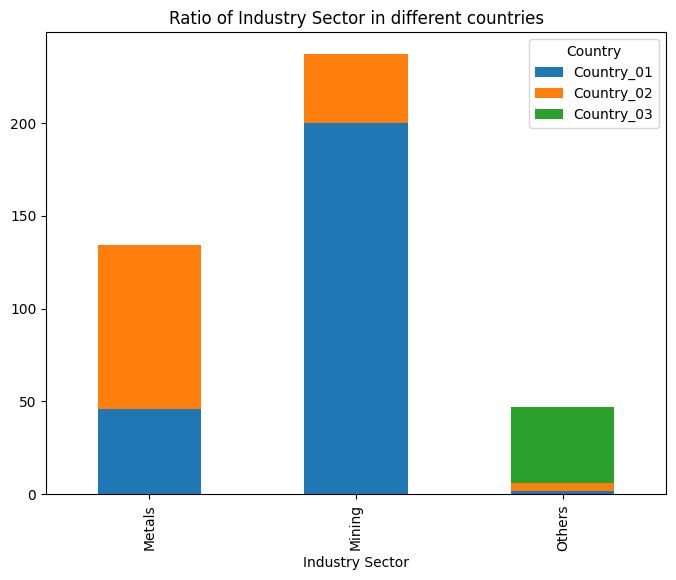

In [ ]:
industry_sec_country_table = pd.crosstab(index = data['Industry Sector'], columns = data['Country'])
industry_sec_country_table.plot(kind = 'bar', figsize=(8,6), stacked = True)
plt.title("Ratio of Industry Sector in different countries")
plt.show()

In [ ]:
func = lambda x : np.round(x/x.sum() * 100)
Ind_gender = data.groupby(['Gender','Industry Sector'])['Industry Sector'].count().unstack().apply(func, axis=1)

hv.Bars(pd.melt(Ind_gender.reset_index(), ['Gender']), ['Gender','Industry Sector'], 'value').opts(opts.Bars(title="Industry Sector by Gender Count", width=800, height=300,tools=['hover'],\
                                                                show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

:Bars   [Gender,Industry Sector]   (value)

In [ ]:
# Was getting an error/decolorization in below graphs due to categorical nature of
# the 'Accident Level' and 'Potential Accident Level' variables.
# So, converting them to string and using an alternative dataframe  - AAT, 20241114
data2 = data
data2['Accident Level'] = data2['Accident Level'].astype(str)
data2['Potential Accident Level'] = data2['Potential Accident Level'].astype(str)

func = lambda x : np.round(x/x.sum() * 100)

accident_gender = data2.groupby(['Gender','Accident Level'])['Accident Level'].count().unstack().apply(func, axis=1)
ac = hv.Bars(pd.melt(accident_gender.reset_index(), ['Gender']), ['Gender','Accident Level'], 'value').opts(opts.Bars(title="Accident Level by Gender Count"))

pot_ac_gen = data2.groupby(['Gender','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(func, axis=1)
pot_ac = hv.Bars(pd.melt(pot_ac_gen.reset_index(), ['Gender']), ['Gender','Potential Accident Level'], 'value').opts(opts.Bars(title="Potential Accident Level by Gender Count"))

(ac + pot_ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%'))

:Layout
   .Bars.I  :Bars   [Gender,Accident Level]   (value)
   .Bars.II :Bars   [Gender,Potential Accident Level]   (value)

In [ ]:
func = lambda x : np.round(x/x.sum() * 100)

ac_em = data2.groupby(['Employment Type','Accident Level'])['Accident Level'].count().unstack().apply(func, axis=1)
ac = hv.Bars(pd.melt(ac_em.reset_index(), ['Employment Type']), ['Employment Type','Accident Level'], 'value').opts(opts.Bars(title="Accident Level by Employee type Count"))

pot_ac_em = data2.groupby(['Employment Type','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(func, axis=1)
pot_ac = hv.Bars(pd.melt(pot_ac_em.reset_index(), ['Employment Type']), ['Employment Type','Potential Accident Level'], 'value').opts(opts.Bars(title="Potential Accident Level by Employee type Count"))
(ac + pot_ac).opts(opts.Bars(width=400, height=300,tools=['hover'],show_grid=True,xrotation=0, ylabel="Percentage", yformatter='%d%%',fontsize={'title':9}))

:Layout
   .Bars.I  :Bars   [Employment Type,Accident Level]   (value)
   .Bars.II :Bars   [Employment Type,Potential Accident Level]   (value)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 424
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date of Occurance         418 non-null    datetime64[ns]
 1   Country                   418 non-null    object        
 2   Local                     418 non-null    object        
 3   Industry Sector           418 non-null    object        
 4   Accident Level            418 non-null    object        
 5   Potential Accident Level  418 non-null    object        
 6   Gender                    418 non-null    object        
 7   Employment Type           418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Description               418 non-null    object        
 10  Year                      418 non-null    int64         
 11  Month                     418 non-null    int64         
 12  Day                       4

In [ ]:
func = lambda x : np.round(x/x.sum() * 100)

ac_mo = data2.groupby(['Month','Accident Level'])['Accident Level'].count().unstack().apply(func, axis=1).fillna(0)


# Changed the column names from roman to numeric - AAT, 20241114
ac = hv.Curve(ac_mo['1'], label='I') * hv.Curve(ac_mo['2'], label='II') * hv.Curve(ac_mo['3'], label='III') * hv.Curve(ac_mo['4'], label='IV') * hv.Curve(ac_mo['5'], label='V')\
        .opts(opts.Curve(title="Accident Level by Month Count"))

pot_ac_mo = data.groupby(['Month','Potential Accident Level'])['Potential Accident Level'].count().unstack().apply(func, axis=1).fillna(0)
pot_ac = hv.Curve(pot_ac_mo['1'], label='I') * hv.Curve(pot_ac_mo['2'], label='II') * hv.Curve(pot_ac_mo['3'], label='III') * hv.Curve(pot_ac_mo['4'], label='IV')\
        * hv.Curve(pot_ac_mo['5'], label='V') * hv.Curve(pot_ac_mo['6'], label='VI').opts(opts.Curve(title="Potential Accident Level by Month Count"))

(ac+pot_ac).opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Percentage", yformatter='%d%%')).cols(1)

:Layout
   .Overlay.I  :Overlay
      .Curve.I   :Curve   [Month]   (1)
      .Curve.II  :Curve   [Month]   (2)
      .Curve.III :Curve   [Month]   (3)
      .Curve.IV  :Curve   [Month]   (4)
      .Curve.V   :Curve   [Month]   (5)
   .Overlay.II :Overlay
      .Curve.I   :Curve   [Month]   (1)
      .Curve.II  :Curve   [Month]   (2)
      .Curve.III :Curve   [Month]   (3)
      .Curve.IV  :Curve   [Month]   (4)
      .Curve.V   :Curve   [Month]   (5)
      .Curve.VI  :Curve   [Month]   (6)

In [ ]:
data_corr = data[['Year','Month','Day','WeekofYear']].copy()
data_corr.corr()

,Year,Month,Day,WeekofYear
Year,1.000000,-0.416621,-0.001982,-0.418798
Month,-0.416621,1.000000,0.002133,0.964295
Day,-0.001982,0.002133,1.000000,0.060982
WeekofYear,-0.418798,0.964295,0.060982,1.000000


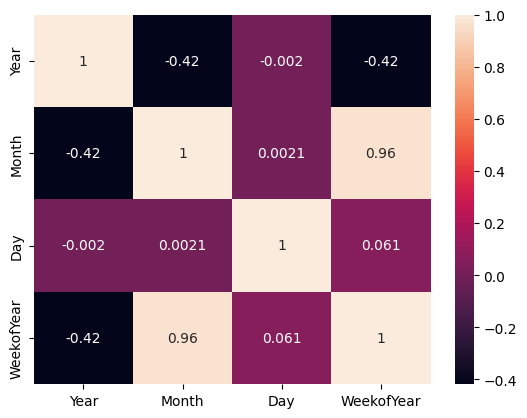

In [ ]:
sns.heatmap(data_corr.corr(), annot=True);

In [ ]:
data.head()

,Date of Occurance,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employment Type,Critical Risk,Description,Year,Month,Day,WeekdayName,Weekday,WeekofYear
0,2016-01-01,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,4,53
1,2016-01-02,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,5,53
2,2016-01-06,Country_01,Local_03,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,2,1
3,2016-01-08,Country_01,Local_04,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,4,1
4,2016-01-10,Country_01,Local_04,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,6,1


####Text Pre-processing

In [ ]:
#installing the essential libraries for text preprocessing

!pip install unidecode gensim -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 8.1 MB/s eta 0:00:00


In [ ]:
!pip install zeugma==0.41

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for zeugma: filename=zeugma-0.41-py3-none-any.whl size=9857 sha256=d9bc6676f4507691a025a06ebe02beae9138dd52fbd29130190ccdb42c6b51f7
  Stored in directory: /root/.cache/pip/wheels/6c/d0/59/b79d6e0e1c2751807c93f13f13251616eeffa7e9e59bcf590f
  Created wheel for fastText: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296182 sha256=8aa0e255b7d321e2cf00bee94dfebc6a6ddcdefec1618dea03697c929bc77a09
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built zeugma fastText


In [ ]:
!pip install fasttext

In [ ]:
import re
import string
import unidecode
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords

nltk.download('omw-1.4')

import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.lang.en import English

from gensim.models import Word2Vec

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
pd.set_option('max_colwidth', None)

In [ ]:
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # TODO in many places, the measurement units include the '/' symbol. If the accuracy of the model is not good, replace / with word 'per' instead of completely omitting it - AAT, 20241114

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

data['cleaned_desc'] = data['Description'].apply(remove_special_characters)
data.loc[0:5, ['Description', 'cleaned_desc']]

,Description,cleaned_desc
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",While removing the drill rod of the Jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",During the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital Note of sulphide solution 48 grams liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",In the sub station MILPO located at level 170 when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",Being 9 45 am approximately in the Nv 1880 CX 695 OB7 the personnel begins the task of unlocking the Soquet bolts of the BHB machine when they were in the penultimate bolt they identified that the hexagonal head was worn proceeding Mr Crist bal Auxiliary assistant to climb to the platform to exert pressure with your hand on the DADO key to prevent it from coming out of the bolt in those moments two collaborators rotate with the lever in anti clockwise direction leaving the key of the bolt hitting the palm of the left hand causing the injury
4,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described.",Approximately at 11 45 a m in circumstances that the mechanics Anthony group leader Eduardo and Eric Fern ndez injured the three of the Company IMPROMEC performed the removal of the pulley of the motor of the pump

In [ ]:
data['cleaned_desc'] = data['cleaned_desc'].str.lower()

In [ ]:
data.loc[0:5, ['Description', 'cleaned_desc']]

,Description,cleaned_desc
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution 48 grams liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",in the sub station milpo located at level 170 when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",being 9 45 am approximately in the nv 1880 cx 695 ob7 the personnel begins the task of unlocking the soquet bolts of the bhb machine when they were in the penultimate bolt they identified that the hexagonal head was worn proceeding mr crist bal auxiliary assistant to climb to the platform to exert pressure with your hand on the dado key to prevent it from coming out of the bolt in those moments two collaborators rotate with the lever in anti clockwise direction leaving the key of the bolt hitting the palm of the left hand causing the injury
4,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described.",approximately at 11 45 a m in circumstances that the mechanics anthony group leader eduardo and eric fern ndez injured the three of the company impromec performed the removal of the pulley of the motor of the pump

In [ ]:
data['cleaned_desc'] = data['cleaned_desc'].str.strip()

In [ ]:
data.loc[0:5, ['Description', 'cleaned_desc']]

,Description,cleaned_desc
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution 48 grams liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",in the sub station milpo located at level 170 when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",being 9 45 am approximately in the nv 1880 cx 695 ob7 the personnel begins the task of unlocking the soquet bolts of the bhb machine when they were in the penultimate bolt they identified that the hexagonal head was worn proceeding mr crist bal auxiliary assistant to climb to the platform to exert pressure with your hand on the dado key to prevent it from coming out of the bolt in those moments two collaborators rotate with the lever in anti clockwise direction leaving the key of the bolt hitting the palm of the left hand causing the injury
4,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described.",approximately at 11 45 a m in circumstances that the mechanics anthony group leader eduardo and eric fern ndez injured the three of the company impromec performed the removal of the pulley of the motor of the pump

In [ ]:
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

data['no_stp_wrds_desc'] = data['cleaned_desc'].apply(remove_stopwords)

In [ ]:
data.loc[0:5, ['cleaned_desc', 'no_stp_wrds_desc']]

,cleaned_desc,no_stp_wrds_desc
0,while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo,removing drill rod jumbo 08 maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic supports one end drill equipment pull hands bar accelerate removal moment bar slides point support tightens fingers mechanic drilling bar beam jumbo
1,during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution 48 grams liter,activation sodium sulphide pump piping uncoupled sulfide solution designed area reach maid immediately made use emergency shower directed ambulatory doctor later hospital note sulphide solution 48 grams liter
2,in the sub station milpo located at level 170 when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury,sub station milpo located level 170 collaborator excavation work pick hand tool hitting rock flat part beak bounces hitting steel tip safety shoe metatarsal area left foot collaborator causing injury
3,being 9 45 am approximately in the nv 1880 cx 695 ob7 the personnel begins the task of unlocking the soquet bolts of the bhb machine when they were in the penultimate bolt they identified that the hexagonal head was worn proceeding mr crist bal auxiliary assistant to climb to the platform to exert pressure with your hand on the dado key to prevent it from coming out of the bolt in those moments two collaborators rotate with the lever in anti clockwise direction leaving the key of the bolt hitting the palm of the left hand causing the injury,9 45 approximately nv 1880 cx 695 ob7 personnel begins task unlocking soquet bolts bhb machine penultimate bolt identified hexagonal head worn proceeding mr crist bal auxiliary assistant climb platform exert pressure hand dado key prevent coming bolt moments two collaborators rotate lever anti clockwise direction leaving key bolt hitting palm left hand causing injury
4,approximately at 11 45 a m in circumstances that the mechanics anthony group leader eduardo and eric fern ndez injured the three of the company impromec performed the removal of the pulley of the motor of the pump 3015 in the zaf of marcy 27 cm length 33 cm weight 70 kg as it was locked proceed to heating the pulley to loosen it it comes out and falls from a distance of 1 06 meters high and hits the instep of the right foot of the worker causing the injury described,approximately 11 45 circumstances mechanics anthony group leader eduardo eric fern ndez injured three company impromec performed removal pulley motor pump 3015 zaf marcy 27 cm length 33 cm weight 70 kg locked proceed heating pulley loosen comes falls distance 1 06 meters high hits instep right foot worker causing injury described
5,during the unloading operation of the ustulado bag there was a need to unclog the discharge mouth of the silo truck in performing this procedure there was a maneuver of unhooking the hose without the total depressurisation of the mouth projecting ustulado powder in the collaborator caused irritation in the eyes,unloading operation ustulado bag need unclog discharge mouth silo truck performing procedure maneuver unhooking hose without total depressurisation mouth projecting ustula

In [ ]:
ps = PorterStemmer()

def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

data['stemmed_desc'] = data['no_stp_wrds_desc'].apply(apply_porter_stemmer)

In [ ]:
data.loc[0:5,['no_stp_wrds_desc','stemmed_desc']]

,no_stp_wrds_desc,stemmed_desc
0,removing drill rod jumbo 08 maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic supports one end drill equipment pull hands bar accelerate removal moment bar slides point support tightens fingers mechanic drilling bar beam jumbo,remov drill rod jumbo 08 mainten supervisor proce loosen support intermedi central facilit remov see mechan support one end drill equip pull hand bar acceler remov moment bar slide point support tighten finger mechan drill bar beam jumbo
1,activation sodium sulphide pump piping uncoupled sulfide solution designed area reach maid immediately made use emergency shower directed ambulatory doctor later hospital note sulphide solution 48 grams liter,activ sodium sulphid pump pipe uncoupl sulfid solut design area reach maid immedi made use emerg shower direct ambulatori doctor later hospit note sulphid solut 48 gram liter
2,sub station milpo located level 170 collaborator excavation work pick hand tool hitting rock flat part beak bounces hitting steel tip safety shoe metatarsal area left foot collaborator causing injury,sub station milpo locat level 170 collabor excav work pick hand tool hit rock flat part beak bounc hit steel tip safeti shoe metatars area left foot collabor caus injuri
3,9 45 approximately nv 1880 cx 695 ob7 personnel begins task unlocking soquet bolts bhb machine penultimate bolt identified hexagonal head worn proceeding mr crist bal auxiliary assistant climb platform exert pressure hand dado key prevent coming bolt moments two collaborators rotate lever anti clockwise direction leaving key bolt hitting palm left hand causing injury,9 45 approxim nv 1880 cx 695 ob7 personnel begin task unlock soquet bolt bhb machin penultim bolt identifi hexagon head worn proceed mr crist bal auxiliari assist climb platform exert pressur hand dado key prevent come bolt moment two collabor rotat lever anti clockwis direct leav key bolt hit palm left hand caus injuri
4,approximately 11 45 circumstances mechanics anthony group leader eduardo eric fern ndez injured three company impromec performed removal pulley motor pump 3015 zaf marcy 27 cm length 33 cm weight 70 kg locked proceed heating pulley loosen comes falls distance 1 06 meters high hits instep right foot worker causing injury described,approxim 11 45 circumst mechan anthoni group leader eduardo eric fern ndez injur three compani impromec perform remov pulley motor pump 3015 zaf marci 27 cm length 33 cm weight 70 kg lock proceed heat pulley loosen come fall distanc 1 06 meter high hit instep right foot worker caus injuri describ
5,unloading operation ustulado bag need unclog discharge mouth silo truck performing procedure maneuver unhooking hose without total depressurisation mouth projecting ustulado powder collaborator caused irritation eyes,unload oper ustulado bag need unclog discharg mouth silo truck perform procedur maneuv unhook hose without total depressuris mouth project ustulado powder collabor caus irrit eye


In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

data['lemmet_desc'] = data['stemmed_desc'].apply(lemmatize_text)
data.loc[0:5, ['stemmed_desc', 'lemmet_desc']]

,stemmed_desc,lemmet_desc
0,remov drill rod jumbo 08 mainten supervisor proce loosen support intermedi central facilit remov see mechan support one end drill equip pull hand bar acceler remov moment bar slide point support tighten finger mechan drill bar beam jumbo,remov drill rod jumbo 08 mainten supervisor proce loosen support intermedi central facilit remov see mechan support one end drill equip pull hand bar acceler remov moment bar slide point support tighten finger mechan drill bar beam jumbo
1,activ sodium sulphid pump pipe uncoupl sulfid solut design area reach maid immedi made use emerg shower direct ambulatori doctor later hospit note sulphid solut 48 gram liter,activ sodium sulphid pump pipe uncoupl sulfid solut design area reach maid immedi made use emerg shower direct ambulatori doctor later hospit note sulphid solut 48 gram liter
2,sub station milpo locat level 170 collabor excav work pick hand tool hit rock flat part beak bounc hit steel tip safeti shoe metatars area left foot collabor caus injuri,sub station milpo locat level 170 collabor excav work pick hand tool hit rock flat part beak bounc hit steel tip safeti shoe metatars area left foot collabor caus injuri
3,9 45 approxim nv 1880 cx 695 ob7 personnel begin task unlock soquet bolt bhb machin penultim bolt identifi hexagon head worn proceed mr crist bal auxiliari assist climb platform exert pressur hand dado key prevent come bolt moment two collabor rotat lever anti clockwis direct leav key bolt hit palm left hand caus injuri,9 45 approxim nv 1880 cx 695 ob7 personnel begin task unlock soquet bolt bhb machin penultim bolt identifi hexagon head worn proceed mr crist bal auxiliari assist climb platform exert pressur hand dado key prevent come bolt moment two collabor rotat lever anti clockwis direct leav key bolt hit palm left hand caus injuri
4,approxim 11 45 circumst mechan anthoni group leader eduardo eric fern ndez injur three compani impromec perform remov pulley motor pump 3015 zaf marci 27 cm length 33 cm weight 70 kg lock proceed heat pulley loosen come fall distanc 1 06 meter high hit instep right foot worker caus injuri describ,approxim 11 45 circumst mechan anthoni group leader eduardo eric fern ndez injur three compani impromec perform remov pulley motor pump 3015 zaf marci 27 cm length 33 cm weight 70 kg lock proceed heat pulley loosen come fall distanc 1 06 meter high hit instep right foot worker caus injuri describ
5,unload oper ustulado bag need unclog discharg mouth silo truck perform procedur maneuv unhook hose without total depressuris mouth project ustulado powder collabor caus irrit eye,unload oper ustulado bag need unclog discharg mouth silo truck perform procedur maneuv unhook hose without total depressuris mouth project ustulado powder collabor caus irrit eye


In [ ]:
words_list = [item.split(" ") for item in data['lemmet_desc'].values]

In [174]:
vec_size = 500
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [ ]:
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 2574


In [ ]:
words = list(model_W2V.wv.key_to_index.keys())

wvs = model_W2V.wv[words].tolist()

word_vector_dict = dict(zip(words, wvs))

In [114]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]


    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector


In [116]:
# creating a dataframe of the vectorized documents
df_Word2Vec = pd.DataFrame(data['lemmet_desc'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Word2Vec

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 490,Feature 491,Feature 492,Feature 493,Feature 494,Feature 495,Feature 496,Feature 497,Feature 498,Feature 499
0,0.007148,0.011409,0.008971,0.008117,-0.002773,-0.011906,0.001550,0.016629,0.004119,0.003990,...,0.004060,-0.006075,0.011337,-0.000867,0.004201,-0.000362,-0.001067,-0.015788,-0.008370,-0.006465
1,0.004284,0.006317,0.005447,0.004185,-0.001791,-0.007250,0.001236,0.009086,0.002532,0.002536,...,0.002176,-0.003141,0.005943,-0.000621,0.001912,-0.000102,-0.000828,-0.008874,-0.004385,-0.004113
2,0.006761,0.011446,0.009203,0.007884,-0.003140,-0.011950,0.001577,0.016376,0.004019,0.003833,...,0.004082,-0.005870,0.010617,-0.000838,0.003777,-0.000425,-0.001201,-0.015178,-0.007653,-0.006652
3,0.005388,0.008964,0.007112,0.005987,-0.002615,-0.009565,0.000863,0.012391,0.003104,0.002889,...,0.003068,-0.004828,0.008304,-0.000690,0.002939,-0.000493,-0.001193,-0.011934,-0.006353,-0.004862
4,0.005597,0.008930,0.007552,0.005924,-0.002391,-0.009781,0.001188,0.012556,0.003050,0.003363,...,0.003306,-0.004580,0.008648,-0.000888,0.002800,-0.000030,-0.001044,-0.012436,-0.006536,-0.005351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.006524,0.011040,0.009001,0.007183,-0.002722,-0.011440,0.000869,0.015273,0.003842,0.003838,...,0.003825,-0.005539,0.010860,-0.000978,0.003497,-0.000272,-0.001096,-0.015143,-0.008406,-0.005860
414,0.005928,0.010353,0.008242,0.007174,-0.002605,-0.010881,0.001470,0.014293,0.004127,0.003354,...,0.003730,-0.005435,0.009879,-0.000790,0.003762,-0.000639,-0.000838,-0.014072,-0.006858,-0.005737
415,0.006607,0.010840,0.009162,0.007668,-0.002999,-0.011377,0.001507,0.015386,0.003709,0.004130,...,0.003767,-0.005510,0.010715,-0.000678,0.003853,-0.000428,-0.001603,-0.014611,-0.007612,-0.005861
416,0.008620,0.014584,0.011790,0.010212,-0.003873,-0.015470,0.002056,0.020392,0.004741,0.004540,...,0.005029,-0.006883,0.013918,-0.000393,0.005134,-0.000793,-0.001856,-0.019169,-0.009792,-0.007789


**Tokenizing**

In [209]:
# Tokenizing each sentence into a list of words so that it can use efficently
data['tokens'] = data['lemmet_desc'].apply(lambda x: x.split())

# Checking if tokenization is correct
print(data['tokens'].head())

0                                                                                                         [remov, drill, rod, jumbo, 08, mainten, supervisor, proce, loosen, support, intermedi, central, facilit, remov, see, mechan, support, one, end, drill, equip, pull, hand, bar, acceler, remov, moment, bar, slide, point, support, tighten, finger, mechan, drill, bar, beam, jumbo]
1                                                                                                                                                                                  [activ, sodium, sulphid, pump, pipe, uncoupl, sulfid, solut, design, area, reach, maid, immedi, made, use, emerg, shower, direct, ambulatori, doctor, later, hospit, note, sulphid, solut, 48, gram, liter]
2                                                                                                                                                                                     [sub, station, milpo, locat, level, 170, collabor, e

In [210]:
# First lets check for any missing values in the 'lemmet_desc' column
print(data['lemmet_desc'].isnull().sum())

0


In [211]:
# Initialize the CountVectorizer
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(data['lemmet_desc'])

# Convert to DataFrame
bow_data = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())

# Calculate the average BoW vector
avg_bow_vector = np.mean(bow_data, axis=0)

# Print Average BoW Vector (First 5 elements)
print("\nAverage BoW Vector (First 5 elements):")
print([f'{x:.4f}' for x in avg_bow_vector[:5]])



Average BoW Vector (First 5 elements):
['0.0287', '0.0024', '0.0024', '0.0335', '0.0072']


In [212]:
# Convert BoW to DataFrame
bow_columns = ['bow_' + col for col in bow_vectorizer.get_feature_names_out()]
df_BoW = pd.DataFrame(bow_matrix.toarray(), columns=bow_columns)
df_BoW

,bow_00,bow_001,bow_007,bow_01,bow_018,bow_0183,bow_02,bow_020,bow_02bp0166,bow_02bp0167,...,bow_young,bow_z014,bow_zaf,bow_zamac,bow_zaro,bow_zero,bow_zinc,bow_zinco,bow_zn,bow_zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
# Initializing the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['lemmet_desc'])

# Converting to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Now will calculate the average TF-IDF vector
avg_tfidf_vector = np.mean(tfidf_df, axis=0)

# Print Average TF-IDF Vector (First 5 elements)
print("\nAverage TF-IDF Vector (First 5 elements):")
print([f'{x:.4f}' for x in avg_tfidf_vector[:5]])



Average TF-IDF Vector (First 5 elements):
['0.0049', '0.0005', '0.0004', '0.0054', '0.0013']


In [221]:
# Converting TF-IDF to DataFrame
df_TFIDF = pd.DataFrame(tfidf_matrix.toarray(), columns=['tfidf_' + col for col in tfidf_vectorizer.get_feature_names_out()])
df_TFIDF

,tfidf_00,tfidf_001,tfidf_007,tfidf_01,tfidf_018,tfidf_0183,tfidf_02,tfidf_020,tfidf_02bp0166,tfidf_02bp0167,...,tfidf_young,tfidf_z014,tfidf_zaf,tfidf_zamac,tfidf_zaro,tfidf_zero,tfidf_zinc,tfidf_zinco,tfidf_zn,tfidf_zone
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.183177,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.223908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
from gensim.models import FastText

# Train FastText Model
fasttext_model = FastText(sentences=data['tokens'], vector_size=100, window=5, min_count=1, workers=4)
fasttext_vectors = [np.mean([fasttext_model.wv[word] for word in tokens if word in fasttext_model.wv] or [np.zeros(100)], axis=0) for tokens in data['tokens']]

# Calculate the average FastText vector
avg_fasttext_vector = np.mean(fasttext_vectors, axis=0)

# Print Average FastText Vector (First 5 elements)
print("\nAverage FastText Vector (First 5 elements):")
print([f'{x:.4f}' for x in avg_fasttext_vector[:5]])



Average FastText Vector (First 5 elements):
['-0.2156', '0.0120', '-0.0647', '0.0236', '0.2053']


In [216]:
# COnverting to Dataframe
model_FastText = FastText(sentences=words_list, vector_size=vec_size, window=5, min_count=1, workers=6)

print("Length of the vocabulary (FastText):", len(list(model_FastText.wv.key_to_index)))
words_fasttext = list(model_FastText.wv.key_to_index.keys())
word_vector_dict_fasttext = {word: model_FastText.wv[word] for word in words_fasttext}

def average_vectorizer_FastText(doc):
    feature_vector = np.zeros((vec_size,), dtype="float64")
    words_in_vocab = [word for word in doc.split() if word in words_fasttext]
    for word in words_in_vocab:
        feature_vector += word_vector_dict_fasttext[word]
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)
    return feature_vector

df_FastText = pd.DataFrame(data['lemmet_desc'].apply(average_vectorizer_FastText).tolist(), columns=['fasttext_' + str(i) for i in range(vec_size)])
df_FastText

Length of the vocabulary (FastText): 2574


,fasttext_0,fasttext_1,fasttext_2,fasttext_3,fasttext_4,fasttext_5,fasttext_6,fasttext_7,fasttext_8,fasttext_9,...,fasttext_490,fasttext_491,fasttext_492,fasttext_493,fasttext_494,fasttext_495,fasttext_496,fasttext_497,fasttext_498,fasttext_499
0,-0.003346,0.092907,0.003205,-0.066737,0.025483,0.012405,-0.012309,0.029642,-0.033341,-0.023232,...,-0.080208,-0.084385,0.003660,0.047994,0.037457,-0.035992,-0.054079,0.017751,0.000369,-0.021094
1,-0.002511,0.067578,0.002353,-0.048522,0.018395,0.009015,-0.008979,0.021607,-0.024164,-0.016917,...,-0.058274,-0.061339,0.002620,0.034824,0.027139,-0.026116,-0.039431,0.012889,0.000405,-0.015410
2,-0.003145,0.084056,0.002924,-0.060305,0.022974,0.011120,-0.011192,0.026910,-0.030219,-0.021163,...,-0.072516,-0.076523,0.003280,0.043461,0.033682,-0.032574,-0.048968,0.016119,0.000493,-0.019155
3,-0.002594,0.070629,0.002479,-0.050646,0.019297,0.009391,-0.009348,0.022520,-0.025313,-0.017770,...,-0.061085,-0.064235,0.002804,0.036470,0.028287,-0.027447,-0.041201,0.013496,0.000340,-0.016047
4,-0.002603,0.074029,0.002627,-0.053211,0.020182,0.009780,-0.009833,0.023534,-0.026583,-0.018530,...,-0.063734,-0.067168,0.002915,0.038083,0.029677,-0.028466,-0.043114,0.014206,0.000448,-0.016831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.003221,0.086570,0.003008,-0.062106,0.023670,0.011481,-0.011538,0.027491,-0.030908,-0.021709,...,-0.074752,-0.078666,0.003392,0.044584,0.034778,-0.033391,-0.050380,0.016551,0.000431,-0.019457
414,-0.002890,0.077905,0.002673,-0.055728,0.021460,0.010343,-0.010343,0.024822,-0.027799,-0.019636,...,-0.067117,-0.070679,0.003087,0.040209,0.031363,-0.030208,-0.045396,0.014937,0.000463,-0.017655
415,-0.002929,0.079585,0.002668,-0.057100,0.021661,0.010564,-0.010687,0.025448,-0.028598,-0.019923,...,-0.068685,-0.072279,0.003060,0.041151,0.032070,-0.030782,-0.046449,0.015378,0.000472,-0.017964
416,-0.003452,0.095619,0.003162,-0.068551,0.026030,0.012691,-0.012569,0.030541,-0.034437,-0.024086,...,-0.082662,-0.086760,0.003885,0.049393,0.038409,-0.036942,-0.055789,0.018402,0.000590,-0.021638


In [217]:
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import gensim.downloader as api

# Loading GloVe model from gensim's models
glove_model = api.load("glove-wiki-gigaword-100")
glove_vectors = [np.mean([glove_model[word] for word in tokens if word in glove_model] or [np.zeros(100)], axis=0) for tokens in data['tokens']]

# Calculate the average GloVe vector
avg_glove_vector = np.mean(glove_vectors, axis=0)

# Print Average GloVe Vector (First 5 elements)
print("\nAverage GloVe Vector (First 5 elements):")
print([f'{x:.4f}' for x in avg_glove_vector[:5]])



Average GloVe Vector (First 5 elements):
['-0.1617', '0.1358', '0.0452', '-0.1456', '-0.0583']


In [218]:
# Converting to dataframe
vec_size_glove = 100
print("Length of the vocabulary (GloVe):", len(list(glove_model.key_to_index.keys())))

def average_vectorizer_GloVe(doc):
    feature_vector = np.zeros((vec_size_glove,), dtype="float64")
    words_in_vocab = [word for word in doc.split() if word in glove_model]
    for word in words_in_vocab:
        feature_vector += glove_model[word]
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)
    return feature_vector

df_GloVe = pd.DataFrame(data['lemmet_desc'].apply(average_vectorizer_GloVe).tolist(), columns=['glove_' + str(i) for i in range(vec_size_glove)])
df_GloVe

Length of the vocabulary (GloVe): 400000


,glove_0,glove_1,glove_2,glove_3,glove_4,glove_5,glove_6,glove_7,glove_8,glove_9,...,glove_90,glove_91,glove_92,glove_93,glove_94,glove_95,glove_96,glove_97,glove_98,glove_99
0,-0.145816,0.148168,0.015640,-0.216440,-0.144937,-0.132402,-0.208501,0.220757,-0.118255,0.128817,...,-0.161326,0.264408,-0.193733,0.029022,-0.057574,-0.073884,-0.042932,-0.175217,0.434862,0.104182
1,-0.171439,0.212236,-0.069287,-0.048557,0.114579,0.041752,0.178636,0.299398,-0.072783,0.226177,...,0.075978,0.002641,-0.130382,-0.131481,-0.232991,-0.084954,-0.012511,-0.368468,0.381449,-0.166563
2,-0.132015,0.153620,0.075415,-0.140076,0.028712,-0.146477,0.008585,0.126988,-0.090984,0.209589,...,-0.041690,0.002062,-0.105144,-0.003989,-0.336047,0.091139,-0.159009,-0.154847,0.599111,-0.114505
3,-0.121610,-0.008220,-0.017752,-0.133620,0.123278,-0.074241,-0.096347,0.070301,-0.137226,-0.116082,...,-0.073001,0.140044,0.036914,-0.011328,-0.125656,-0.072550,0.004253,-0.082516,0.494954,-0.050261
4,-0.080374,0.099033,-0.059866,-0.161126,-0.044841,-0.000553,0.044306,0.209735,-0.305067,0.107770,...,-0.094132,0.144031,-0.035384,0.010960,-0.256674,0.042752,-0.075413,-0.177928,0.455544,-0.268938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.161232,0.016241,0.095968,-0.058573,-0.035591,0.107621,-0.032418,0.063784,-0.106545,0.172475,...,-0.128438,0.147460,-0.035120,-0.007151,-0.045704,-0.212311,0.052636,-0.128326,0.300582,-0.141453
414,0.104132,0.005305,-0.132999,-0.326247,-0.153887,-0.071918,-0.063060,0.088049,0.163999,0.156584,...,-0.095769,0.023777,0.107166,-0.038958,-0.084148,-0.100148,0.045281,-0.104752,0.333268,-0.064730
415,-0.294138,0.112221,0.273076,-0.293037,-0.116861,0.408476,-0.105445,0.213770,-0.044614,-0.037250,...,-0.008060,-0.078036,0.009100,-0.070368,-0.083334,0.094350,-0.079959,-0.017720,0.544011,-0.035263
416,-0.439452,-0.040204,-0.009927,-0.142967,0.036576,0.175996,-0.121329,0.120330,-0.118968,0.156633,...,-0.175355,0.023384,0.004604,-0.067799,-0.309980,0.039969,0.097663,-0.004321,0.468566,-0.033425


In [222]:
#Final Combined Vector DataFrame
final_df = pd.concat([df_BoW, df_TFIDF, df_Word2Vec, df_FastText, df_GloVe], axis=1)

# Reset index and display the final DataFrame shape
final_df.reset_index(drop=True, inplace=True)
print("\nFinal Combined Vector DataFrame Shape:", final_df.shape)

# Show the first 5 rows of the final DataFrame
print("Final Combined Vector DataFrame (First 5 rows):")
print(final_df.head())


Final Combined Vector DataFrame Shape: (418, 6204)
Final Combined Vector DataFrame (First 5 rows):
   bow_00  bow_001  bow_007  bow_01  bow_018  bow_0183  bow_02  bow_020  \
0       0        0        0       0        0         0       0        0   
1       0        0        0       0        0         0       0        0   
2       0        0        0       0        0         0       0        0   
3       0        0        0       0        0         0       0        0   
4       0        0        0       0        0         0       0        0   

   bow_02bp0166  bow_02bp0167  ...  glove_90  glove_91  glove_92  glove_93  \
0             0             0  ... -0.161326  0.264408 -0.193733  0.029022   
1             0             0  ...  0.075978  0.002641 -0.130382 -0.131481   
2             0             0  ... -0.041690  0.002062 -0.105144 -0.003989   
3             0             0  ... -0.073001  0.140044  0.036914 -0.011328   
4             0             0  ... -0.094132  0.144031 -0.0